In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None) 

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.loc[lambda d: d.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

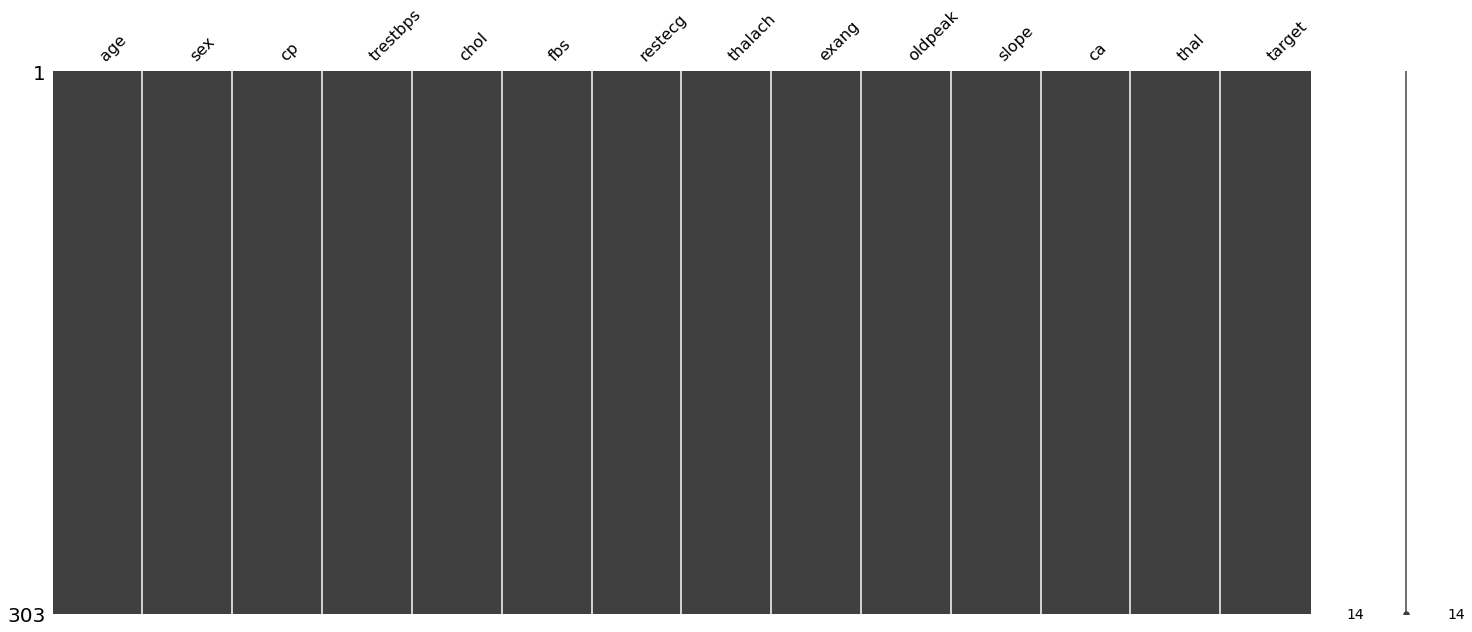

In [9]:
import missingno as msno
msno.matrix(df)

In [10]:
def print_missing_values(df):
    for col in df.columns:
        print(f'{col}: {df[col].isna().sum()}')

In [11]:
print_missing_values(df)

age: 0
sex: 0
cp: 0
trestbps: 0
chol: 0
fbs: 0
restecg: 0
thalach: 0
exang: 0
oldpeak: 0
slope: 0
ca: 0
thal: 0
target: 0


-----

In [12]:
df['target'].unique()

array([1, 0])

In [13]:
def create_distplots(df, cols=4):
    """
    This function creates distribution plots for all numerical features.
    :param df: dataframe
    :param cols: specified amount of columns in the subplots.
    :return: seaborn distplots
    """
    num_vars = df.select_dtypes('number').columns

    if (len(num_vars) % cols) != 0:
        rows = (len(num_vars) // cols) + 1
    else:
        rows = (len(num_vars) // cols)

    fig, ax = plt.subplots(rows, cols, figsize=(20, 10))
    for variable, subplot in zip(num_vars.tolist(), ax.flatten()):
        sns.distplot(df[variable], ax=subplot)

    plt.tight_layout()
    plt.show()

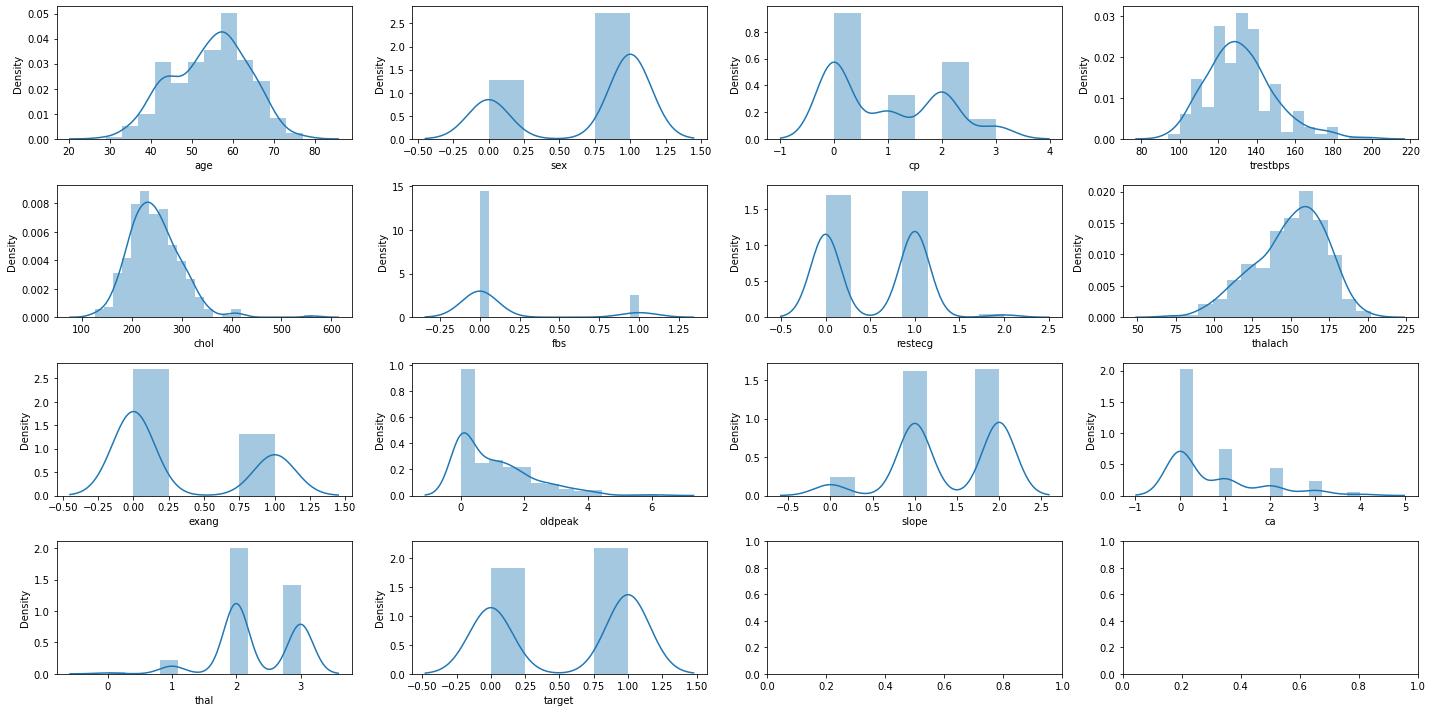

In [14]:
create_distplots(df)

In [15]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

---